In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import imageio

In [115]:
im  = plt.imread("rainbow_mountain.jpg")

In [116]:
im.shape

(1163, 2048, 3)

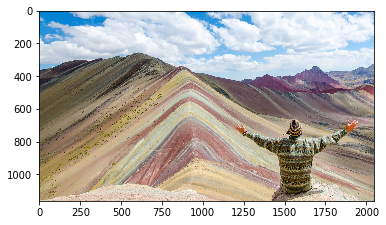

In [117]:
plt.imshow(im)
plt.show()

In [118]:
im_gray = im.mean(axis = 2) #по каналам 

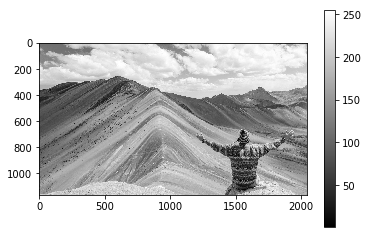

In [119]:
plt.imshow(im_gray, cmap = "gray") #"hot"
plt.colorbar() #шкала
plt.show()

In [120]:
im_gray.shape

(1163, 2048)

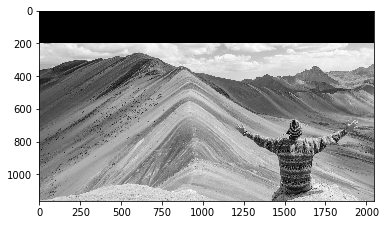

In [121]:
im2 = im_gray.copy()
im2[0:200, :] = 0
plt.imshow(im2, cmap = "gray")
plt.show()

In [122]:
lx, ly = im_gray.shape
X, Y = np.ogrid[0:lx, 0:ly]
print(X.shape, Y.shape)

(1163, 1) (1, 2048)


In [123]:
mask = ((X - lx/2)**2 + (Y - ly/2)**2 > 700**2) #700 - радиус

In [124]:
def plot(im):
    plt.imshow(im, cmap = "gray")
    plt.show()

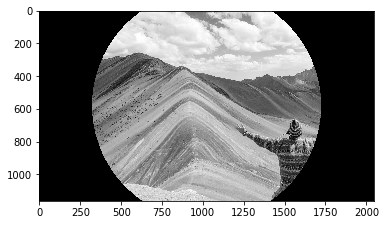

In [125]:
im2 = im_gray.copy()
im2[mask] = 0
plot(im2)

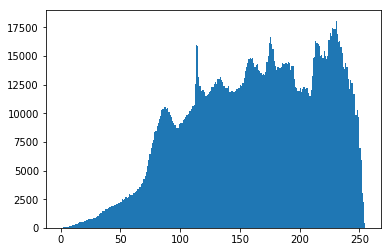

In [126]:
#ravel - раскладывает в тензор (вектор)
plt.hist(im_gray.ravel(), bins = 255) #интенсивность цвета, 0 - чёрный (0-255 - цветов)
plt.show()

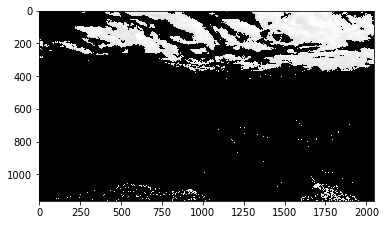

In [127]:
theta = 225
im2 = im_gray.copy()
im2[im2 < theta] = 0 # < - только светлые участки, > - тёмные участки
plot(im2)

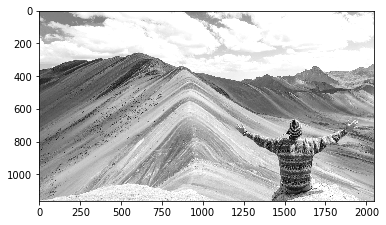

In [128]:
plt.imshow(im_gray, cmap = "gray", clim = (0, 225)) #растягивает изображение
plt.show()

In [129]:
from scipy import interpolate
from scipy import ndimage

In [130]:
def mapping(coord): #смещение пикселей
    x = coord[0]/lx
    y = coord[1]/ly
    return (lx*np.sqrt(x**2 + y**2)/2, ly*(x*y)) #интерполируем
    return(2 * coord[0] - coord[1],
          3 * coord[0] + coord[1])

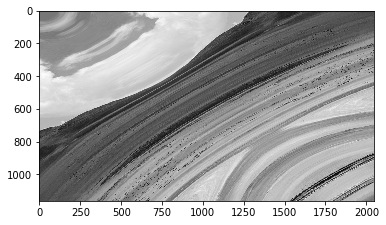

In [131]:
im2 = ndimage.geometric_transform(im_gray, mapping, order = 5) #обернене перетворення
plot(im2)

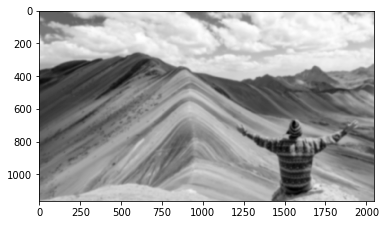

In [132]:
im2 = ndimage.gaussian_filter(im_gray, sigma = 5)
plot(im2)

In [133]:
from scipy import fftpack

In [134]:
F_im = fftpack.fft2(im_gray)

In [135]:
F_im[0][1]

(-19184140.394791905+4661695.565509591j)

In [136]:
x = np.array([1 + 2j, 3 + 1j])

In [137]:
x.real

array([1., 3.])

In [138]:
x.imag

array([2., 1.])

In [139]:
np.abs(x)

array([2.23606798, 3.16227766])

In [140]:
np.angle(x)

array([1.10714872, 0.32175055])

In [141]:
np.conj(x)

array([1.-2.j, 3.-1.j])

In [142]:
F_shifted = fftpack.fftshift(F_im)

In [143]:
F_ampl = np.abs(F_shifted) #ампплитуда
F_phase = np.angle(F_shifted) #фаза

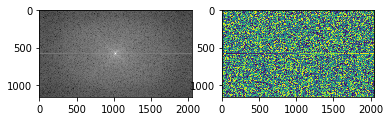

In [144]:
plt.figure()

plt.subplot(1,2,1)
plt.imshow(np.log(1 + F_ampl), cmap = "gray")

plt.subplot(1,2,2)
plt.imshow(F_phase)

plt.show()

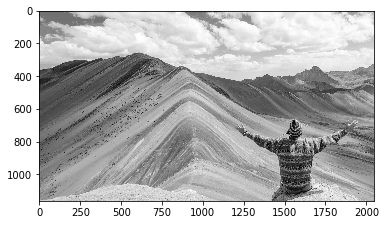

In [145]:
F_inv = fftpack.ifft2(F_im) #обратное превращение
plot(np.abs(F_inv))

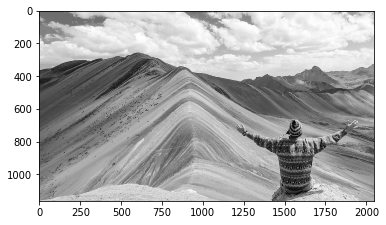

In [146]:
kernel = np.ones((5,5))/25
im_blur = ndimage.convolve(im_gray, kernel)
plot(im_blur)

In [147]:
kernel_padded = np.pad(kernel, [[0, lx - 5],  [0, ly - 5]], 
                      mode = "constant")

In [148]:
kernel_padded

array([[0.04, 0.04, 0.04, ..., 0.  , 0.  , 0.  ],
       [0.04, 0.04, 0.04, ..., 0.  , 0.  , 0.  ],
       [0.04, 0.04, 0.04, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [149]:
kernel_padded.shape

(1163, 2048)

In [150]:
F_kernel = fftpack.fft2(kernel_padded)
F_blur = fftpack.fft2(im_blur)

In [151]:
F_blur.shape

(1163, 2048)

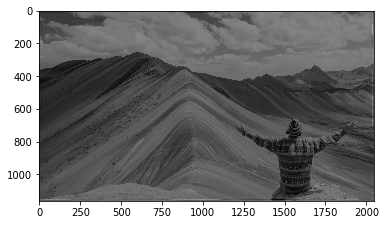

In [152]:
K = 0.01
F_restored = F_blur * (np.conj(F_kernel)/(np.square(np.abs(F_kernel)) + K))
im_restored = np.abs(fftpack.ifft2(F_restored))
plot(im_restored)

/Users/elizabethlorelei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


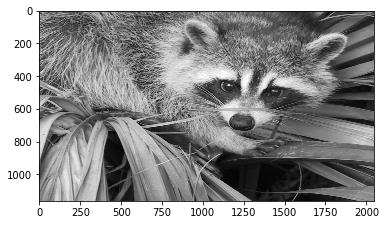

In [155]:
im2 = scipy.misc.face(gray = True)
face = scipy.misc.imresize(im2, (lx, ly))
plot(im3)

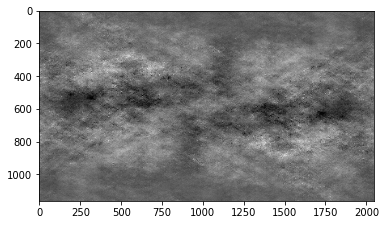

In [162]:
F_im = fftpack.fft2(im_gray)
F_face = fftpack.fft2(face)

im_ampl = np.abs(F_im)
im_phase = np.angle(F_im)

face_ampl = np.abs(F_face)
face_phase = np.angle(F_phase)

F_res1_ampl = im_ampl
F_res1_phase = face_phase


#F_res1_ampl = face_ampl
#F_res1_phase = im_phase
F_res1 = F_res1_ampl * np.exp(1j * F_res1_phase)
res1 = fftpack.ifft2(F_res1)

plot(np.abs(res1))